## Sklearn
* out of the box ml modeling toolkit
* funcitonality for:
    * wrangling data
    * model
    * evaluation
* integreates with pandas and numpy

In [1]:
from sklearn.preprocessing import StandardScaler

In [3]:
x = df.drop("variety", 1)

NameError: name 'df' is not defined

In [7]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
x_scaler = scaler.transform(x)
x_scale_df = pd.DataFrame(x_scaler, columns = x.columns)
x_scale_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-9.695948e-16,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


#### Simple Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [6]:
df = pd.read_csv("../data/iris.csv")
df.head(1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa


In [7]:
y = df["variety"]
x = df.drop("variety", axis = 1)

In [8]:
x.head(1)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2


In [9]:
y.head(1)

0    Setosa
Name: variety, dtype: object

In [10]:
clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
clf.predict([[5.1,3.5,1.4,.2]])

array(['Setosa'], dtype=object)

In [12]:
clf.predict(x)

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

# What is some stuff we could start doing to make this model better

### Train and Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
clf.predict(x_test)

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

### Simple Validation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [16]:
yhat_test = clf.predict(x_test)

In [17]:
accuracy_score(yhat_test, y_test)

1.0

In [19]:
precision_score(yhat_test, y_test, average = "weighted")

1.0

In [20]:
recall_score(yhat_test, y_test, average = "weighted")

1.0

In [30]:
con_matr = confusion_matrix(yhat_test, y_test, labels=["Setosa", "Versicolor", "Virginica"])
con_matr

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [31]:
print(classification_report(yhat_test, y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## In class excercise

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, shuffle = True)

In [28]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
yhat_test = clf.predict(x_test)

In [30]:
print(classification_report(yhat_test, y_test))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
import pydotplus
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image

/Users/luciaronchi/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


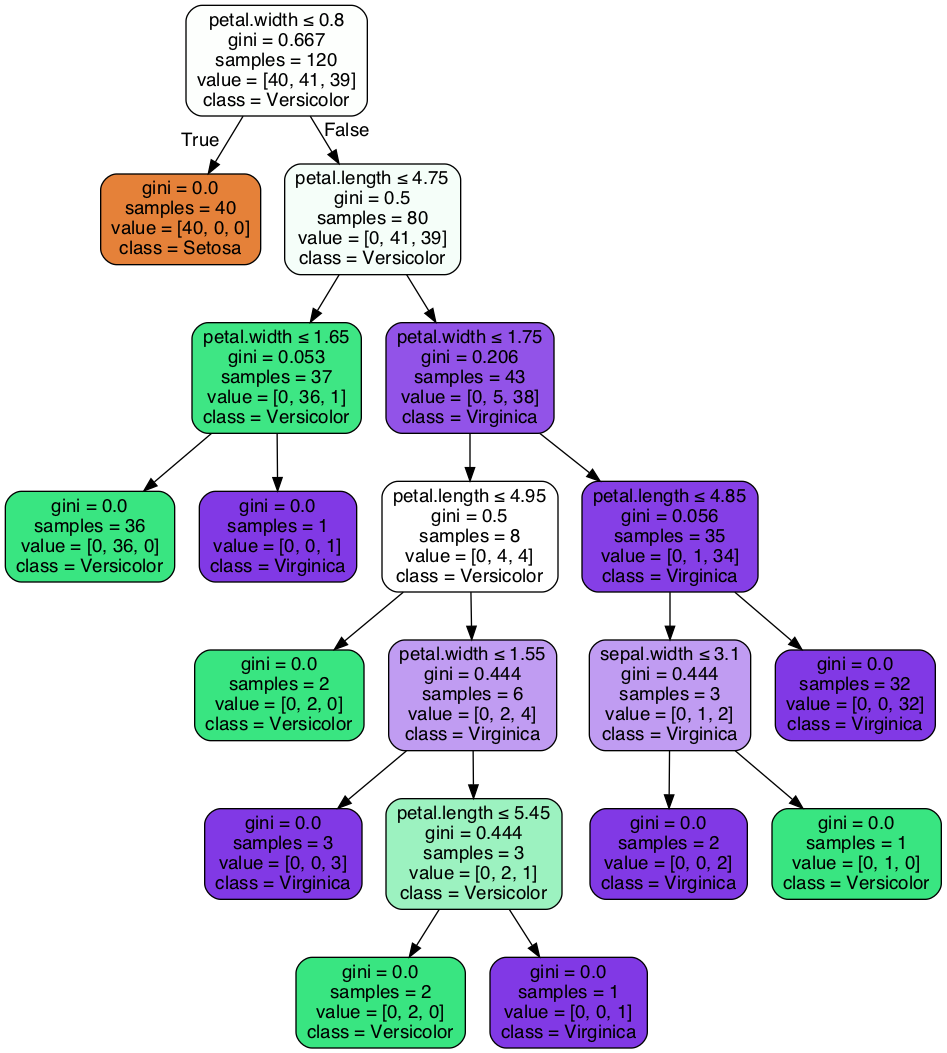

In [34]:
dot_data = StringIO()

export_graphviz(clf, 
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True, 
                feature_names = x.columns,
                class_names = ['Setosa','Versicolor', 'Virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Classification_Tree.png')
Image(graph.create_png())